# A Look at Pittsburgh Neighborhood Safety Through Fire Incidents
There are several key factors that determines a good neighborhood. Cost, location, and safety are all potentiall important things to people when searching for a new neighborhood. In this notebook, we will be looking at how resistant to fires neighborhoods in Pittsburgh are. I chose this metric because an important part of being the best neighborhood is safety. Neighborhoods with more fire incidents may be more prone to having them in the future, which would put the residents at risk. When picking a neighborhood to live in, you would want it to be as safe as possible, including safety from fires.

## Beginning the Analysis:
Using a CSV from the Western Pennsylvania Regional Data Center that details the number of fire incidents per neighborhood in Allegheney County, I will analyze how many fire incidents each neighborhood has. The first thing we ned to do is import pandas and our CSV data file. Now we can do some basic analysis of the data. The first thing we will do is create a dictionary that counts how many fires have occurred in each neighborhood and graph it.


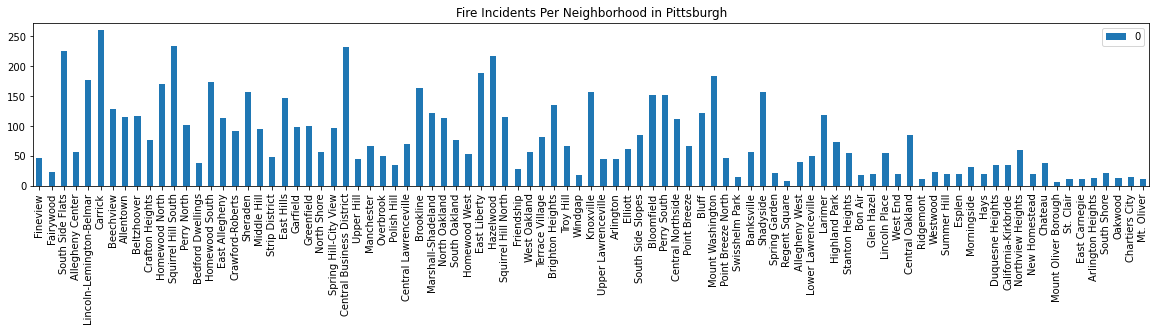

In [16]:
import pandas as pd

#Sets up dataframe from the file and creates an empty dictionary
fires = pd.read_csv("data/fires.csv")
fireCount = {}


#Cycles through the data set and counts the number of fire incidents in each neighborhood. 
#This information is then added to the dictionary
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    severity = row['incident_type']
    if neighborhood in fireCount:
        fireCount[neighborhood] += 1
    elif neighborhood not in fireCount and neighborhood != None:
        fireCount[neighborhood] = 1

#turns the dictionary into a dataframe and creates a basic bar graph
fireCountGraph = pd.DataFrame.from_dict(fireCount, orient='index', dtype = None, columns=None)
fireCountGraph = fireCountGraph.iloc[1: , :]
fireCountGraph.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh")

## Further Analysis:
Now that we have a dictionary of the total fires in each neighborhood, lets also take the severity of each fire. On a scale from 1-50, I have ranked the different kinds of fires based on which I think were more severe. I then stored the total severity count for each neighborhood into a dictionary and graphed it.

{nan: 1122, 'Fineview': 46, 'Fairywood': 23, 'South Side Flats': 225, 'Allegheny Center': 56, 'Lincoln-Lemington-Belmar': 177, 'Carrick': 260, 'Beechview': 129, 'Allentown': 115, 'Beltzhoover': 117, 'Crafton Heights': 76, 'Homewood North': 170, 'Squirrel Hill South': 233, 'Perry North': 102, 'Bedford Dwellings': 38, 'Homewood South': 174, 'East Allegheny': 113, 'Crawford-Roberts': 92, 'Sheraden': 156, 'Middle Hill': 95, 'Strip District': 48, 'East Hills': 147, 'Garfield': 98, 'Greenfield': 100, 'North Shore': 57, 'Spring Hill-City View': 96, 'Central Business District': 232, 'Upper Hill': 44, 'Manchester': 67, 'Overbrook': 50, 'Polish Hill': 35, 'Central Lawrenceville': 69, 'Brookline': 163, 'Marshall-Shadeland': 121, 'North Oakland': 114, 'South Oakland': 77, 'Homewood West': 53, 'East Liberty': 188, 'Hazelwood': 217, 'Squirrel Hill North': 115, 'Friendship': 28, 'West Oakland': 57, 'Terrace Village': 82, 'Brighton Heights': 135, 'Troy Hill': 67, 'Windgap': 18, 'Knoxville': 156, 'Uppe

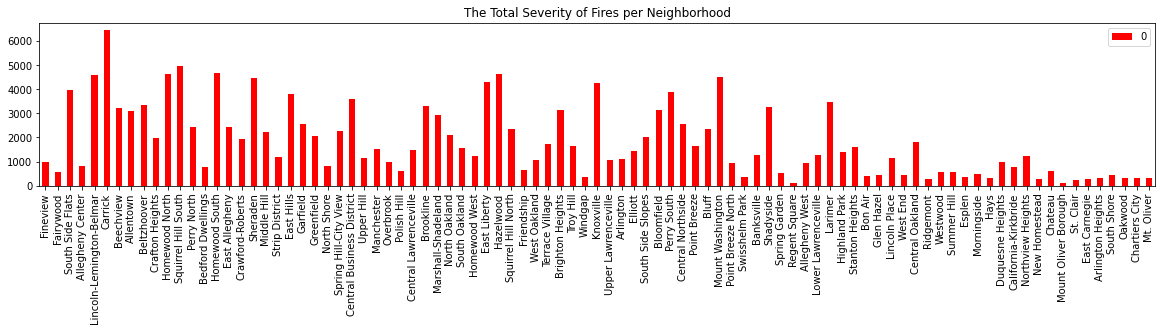

In [19]:
#Creates severity dictionary
fireSeverity = {}
for index, row in fires.iterrows():
    neighborhood = row['neighborhood']
    severity = row['incident_type']
    if neighborhood in fireSeverity:
        if severity == 111:
            fireSeverity[neighborhood] += 50
        elif severity == 131:
            fireSeverity[neighborhood] += 35
        elif severity == 113:
            fireSeverity[neighborhood] += 18
        elif severity == 114:
            fireSeverity[neighborhood] += 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] += 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] += 27
        else:
            fireSeverity[neighborhood] += 5
    elif neighborhood not in fireSeverity and neighborhood != None:
        if severity == 111:
            fireSeverity[neighborhood] = 50
        elif severity == 131:
            fireSeverity[neighborhood] = 35
        elif severity == 113:
            fireSeverity[neighborhood] = 18
        elif severity == 114:
            fireSeverity[neighborhood] = 12
        elif severity == 151 or severity == 150:
            fireSeverity[neighborhood] = 8
        elif severity == 141 or severity == 142 or severity == 143:
            fireSeverity[neighborhood] = 27
        else:
            fireSeverity[neighborhood] = 5
#changes dictionary to dataframe and graphs
fireSeverityGraph = pd.DataFrame.from_dict(fireSeverity, orient='index', dtype = None, columns=None)
fireSeverityGraph = fireSeverityGraph.iloc[1: , :]
fireSeverityGraph.plot.bar(figsize=(20,3), title = "The Total Severity of Fires per Neighborhood", color = "red")

## Even Further Analysis:
Now that we have the total fires in each neighborhood and the total severity of the fires in each, we can find the average severity per fire in each neighborhood. This will allow us to take into consideration that some neighborhoods may have many very minor fires but others may have a few very bad fires. In this code, I create a dictionary of the averages and graph it.

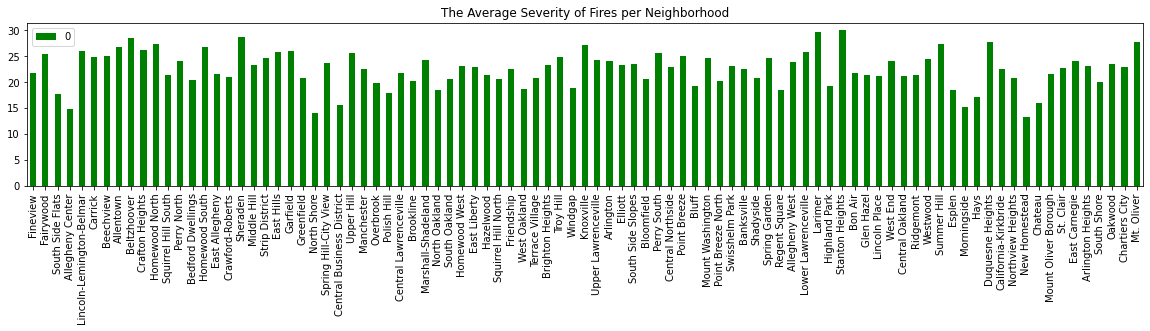

In [20]:
#creates the average severity dictionary
avgSeverity = {}
for neighborhood in fireCount:
    if neighborhood not in avgSeverity:
        avgSeverity[neighborhood] = fireSeverity[neighborhood] / fireCount[neighborhood]
    
#Turns the dictionary into a dataframe and graphs it.
avgSeverityGraph = pd.DataFrame.from_dict(avgSeverity, orient='index', dtype = None, columns=None)
avgSeverityGraph = avgSeverityGraph.iloc[1: , :]
avgSeverityGraph.plot.bar(figsize=(20,3), title = "The Average Severity of Fires per Neighborhood", color = "green")

## Cleaning Up the Data:
Now that we have the number of fire incidents in each neighborhood, the total fire severity in each neighborhood, and the average fire severity in each neighborhood, we can clean up the graph a bit. The previous graph was messy and hard to tell which neighborhoods were the best. Here we will arrange the graph in sorted order to improve the readability.

<AxesSubplot:title={'center':'The Average Severity of Fires per Neighborhood'}>

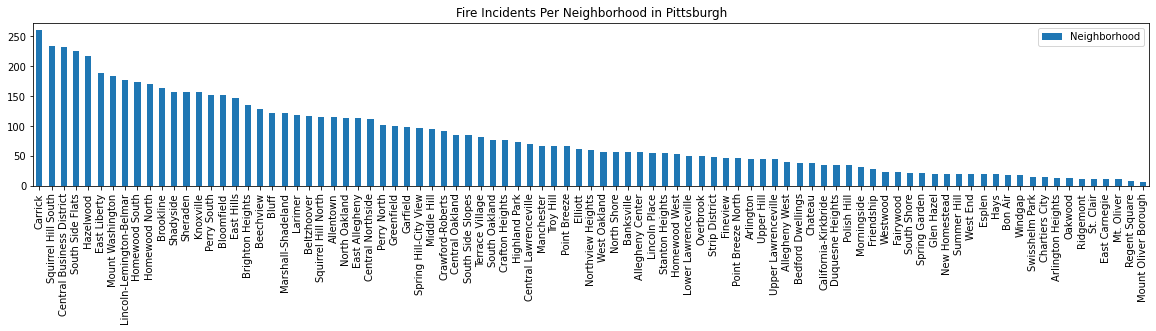

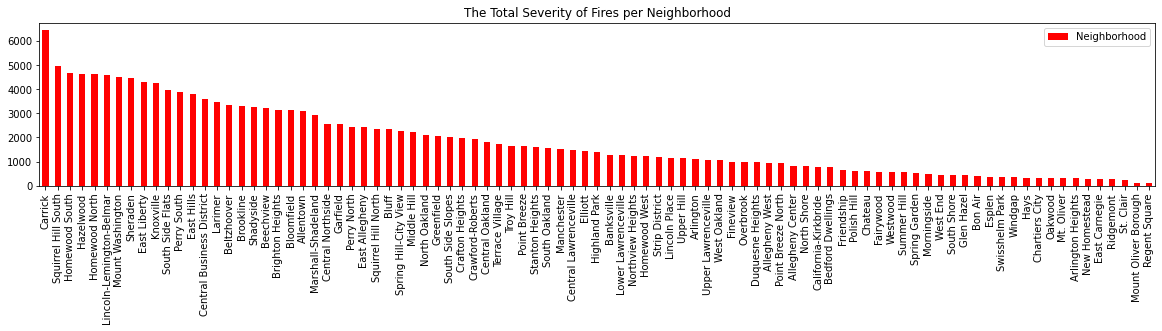

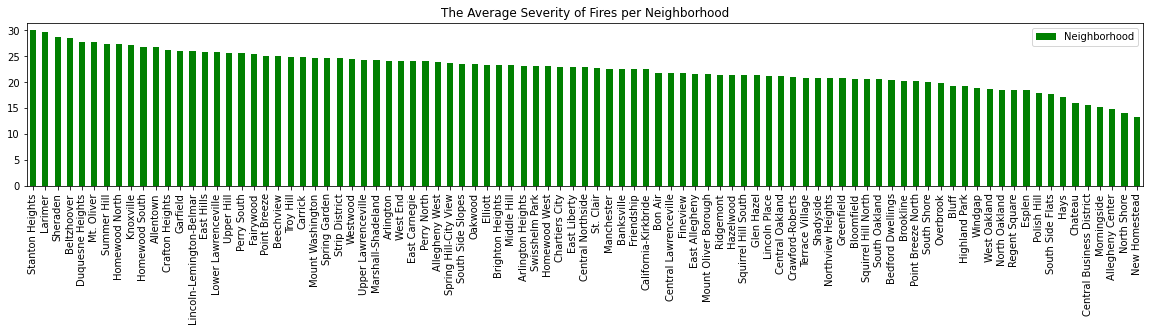

In [4]:
#here we sort the values of the each dataframe and regraph
fireCountGraph.columns = ['Neighborhood']
countSorted = fireCountGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
countSorted.plot.bar(figsize=(20,3), title = "Fire Incidents Per Neighborhood in Pittsburgh")

fireSeverityGraph.columns = ['Neighborhood']
severitySorted = fireSeverityGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
severitySorted.plot.bar(figsize=(20,3), title = "The Total Severity of Fires per Neighborhood", color = "red")

avgSeverityGraph.columns = ['Neighborhood']
avgSorted = avgSeverityGraph.sort_values('Neighborhood', axis = 0, ascending=False, kind = "quicksort")
avgSorted.plot.bar(figsize=(20,3), title = "The Average Severity of Fires per Neighborhood", color = "green")


## Our Winners:
Here, only the lowest three neighborhoods from each dictionary are graphed. We can see that there is a different winner for each one. In the conclusion, I will discuss what this means and which neighborhood is actually the winner. 

<AxesSubplot:title={'center':'Neighborhoods with the Lowest Average Fire Severity'}>

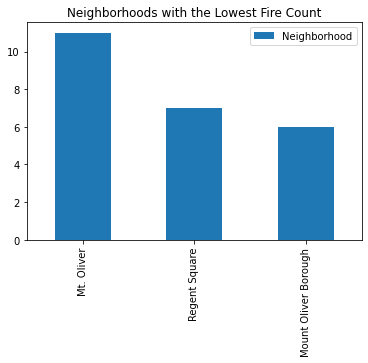

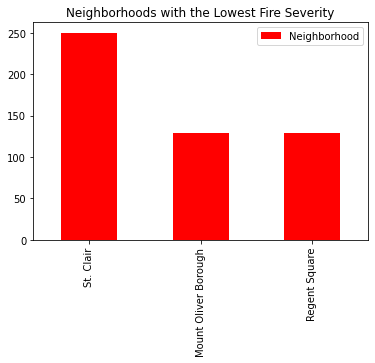

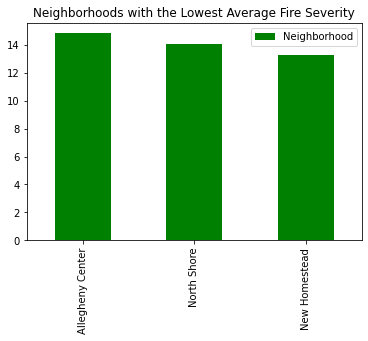

In [5]:
countTopFive = countSorted.tail(3)
countTopFive.plot.bar(title="Neighborhoods with the Lowest Fire Count")

severityTopFive = severitySorted.tail(3)
severityTopFive.plot.bar(title = "Neighborhoods with the Lowest Fire Severity", color = "red")

avgTopFive = avgSorted.tail(3)
avgTopFive.plot.bar(title = "Neighborhoods with the Lowest Average Fire Severity", color = "green")


## Conclusion:
With these final graphs, we can see that there could have been three different winners.  IF we only counted the fire incidents, Mount Oliver Borough would win. If we took the total severity of the incidents, Regent Square would win. And finally, if we only looked at the average severity, New Homestead would win. So what does this mean? Well it means that there must be a decision about which graph is the most important. The average severity per fire is the most important because it depicts which neighborhoods are more dangerous the best. By finding the average severity of the fires, it takes into account not just the number of the fires, but also how bad they are. This is why from my data, I declare theat New Homestead is the best neighborhood in Pittsburgh.

While my metric declared New Homestead as the best neighborhood, my experience states otherwise. My personal favorite neighborhood is Moneroeville due to it having lots to do and is generally a nice area. I believe this discrepency between my favorite neighborhood and the one the data declared the best is due to what determines my favorite neighborhood. Other than Oakland, I have never lived in Pittsburgh, so I never took the fire safety into consideration as I would only be there for a limited time.